In [14]:
import open3d as o3d
import os
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np
import pandas as pd
from PIL import Image

### Showing a simple mesh

In [ ]:
# Defining the path to the 3D model file.
mesh_path = '../assets/alex.obj'

# Reading the 3D model file as a 3D mesh using open3d.
mesh = o3d.io.read_triangle_mesh(mesh_path)

# Visualizing the mesh.
draw_geoms_list = [mesh]
o3d.visualization.draw_geometries(draw_geoms_list)

### Image to 3D

Depth image dtype: uint8
Depth image min/max values: 100 255


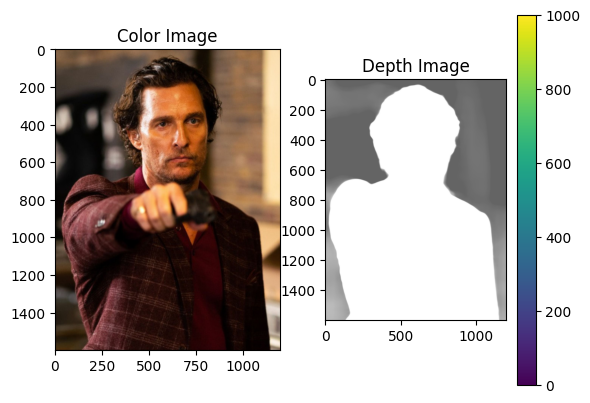

In [36]:
depth_img = cv2.imread("../assets/mc-depth.png", cv2.COLOR_RGB2BGR)
depth_img = cv2.add(depth_img, 100)
#depth_img = depth_img.astype(np.uint16) * 3

print("Depth image dtype:", depth_img.dtype)
print("Depth image min/max values:", depth_img.min(), depth_img.max())

# Load color and depth images
color_raw = o3d.io.read_image("../assets/mc.jpg")
depth_raw = o3d.geometry.Image(depth_img)

# Visualize the color image
plt.subplot(1, 2, 1)
plt.title("Color Image")
plt.imshow(np.asarray(color_raw))

# Visualize the depth image (scaled down for visualization)
plt.subplot(1, 2, 2)
plt.title("Depth Image")
plt.imshow(np.asarray(depth_raw),vmin=0, vmax=1000, cmap='viridis')
plt.colorbar()
plt.show()

# Set up camera intrinsic parameters
# You may adjust these parameters or load them if you have specific calibration data
camera_intrinsics = o3d.camera.PinholeCameraIntrinsic(
    width=640,
    height=480,
    fx=500,  # Focal length x
    fy=500,  # Focal length y
    cx=300,  # Optical center x
    cy=300   # Optical center y
)

# Create RGBD image
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, 
    depth_raw, 
    depth_scale=1000.0,  # Convert depth values from mm to meters, adjust as necessary
    depth_trunc=3.0,     # Truncate depth values beyond 3 meters
    convert_rgb_to_intensity=False
)

# Generate point cloud from RGBD image
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    camera_intrinsics
)

#points = np.asarray(pcd.points)
#valid_points = points[np.all(points != 0, axis=1)]  # Filter out points at (0,0,0)
#pcd.points = o3d.utility.Vector3dVector(valid_points)

# Flip the point cloud (optional, depending on the coordinate system)
pcd.transform([[1, 0, 0, 0],
               [0, -1, 0, 0],
               [0, 0, -1, 0],
               [0, 0, 0, 1]])

# Visualize the point cloud
o3d.visualization.draw_geometries([pcd])